Multi-Class Prediction of Obesity Risk

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [2]:
#reding the file
df = pd.read_csv("train.csv")
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [3]:
df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
df.isna().sum()

In [4]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
for col in df.select_dtypes(include=['object']).columns: 
    print(f"{col} : {df[col].unique()}")

Gender : ['Male' 'Female']
family_history_with_overweight : ['yes' 'no']
FAVC : ['yes' 'no']
CAEC : ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['Sometimes' 'no' 'Frequently']
MTRANS : ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad : ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [ ]:
# Assuming df is your DataFrame with 18 columns

# Calculate the number of rows and columns needed for subplots
num_rows = 6  # You can adjust this based on your preference
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(df.columns):
    df[col].hist(ax=axes[i], bins=20)
    axes[i].set_title(col)

# Hide any remaining empty subplots
for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calculate correlation matrix
df_dummies = pd.get_dummies(df)
df_dummies.corr()

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_dummies.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (including Categorical Columns)')
plt.yticks(rotation=0)
plt.show()

In [ ]:
correlation_matrix = df_dummies.corr()

In [ ]:
# Assuming correlation_matrix is your correlation matrix DataFrame

# Create empty lists to store pairs
positive_correlation_pairs = []
negative_correlation_pairs = []

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.3:
            positive_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation))
        elif correlation <= -0.3:
            negative_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation))

# Convert lists to DataFrames if needed
positive_correlation_df = pd.DataFrame(positive_correlation_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
negative_correlation_df = pd.DataFrame(negative_correlation_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

In [ ]:
positive_correlation_df

In [ ]:
negative_correlation_df

In [ ]:
df_dummies

In [ ]:
# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
df['NObeyesdad'] = ordinal_encoder.fit_transform(df[['NObeyesdad']])
df

In [ ]:
ordinal_encoder = OrdinalEncoder()
df['SMOKE'] = ordinal_encoder.fit_transform(df[['SMOKE']])
df

In [ ]:
ordinal_encoder = OrdinalEncoder()
df['family_history_with_overweight'] = ordinal_encoder.fit_transform(df[['family_history_with_overweight']])
df

In [6]:
for col in df.select_dtypes(include=['object']).columns: 
    ordinal_encoder = OrdinalEncoder()
    df[col] = ordinal_encoder.fit_transform(df[[col]])
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1.0,24.443011,1.699998,81.669950,1.0,1.0,2.000000,2.983297,2.0,0.0,2.763573,0.0,0.000000,0.976473,1.0,3.0,6.0
1,1,0.0,18.000000,1.560000,57.000000,1.0,1.0,2.000000,3.000000,1.0,0.0,2.000000,0.0,1.000000,1.000000,2.0,0.0,1.0
2,2,0.0,18.000000,1.711460,50.165754,1.0,1.0,1.880534,1.411685,2.0,0.0,1.910378,0.0,0.866045,1.673584,2.0,3.0,0.0
3,3,0.0,20.952737,1.710730,131.274851,1.0,1.0,3.000000,3.000000,2.0,0.0,1.674061,0.0,1.467863,0.780199,1.0,3.0,4.0
4,4,1.0,31.641081,1.914186,93.798055,1.0,1.0,2.679664,1.971472,2.0,0.0,1.979848,0.0,1.967973,0.931721,1.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1.0,25.137087,1.766626,114.187096,1.0,1.0,2.919584,3.000000,2.0,0.0,2.151809,0.0,1.330519,0.196680,1.0,3.0,3.0
20754,20754,1.0,18.000000,1.710000,50.000000,0.0,1.0,3.000000,4.000000,1.0,0.0,1.000000,0.0,2.000000,1.000000,1.0,3.0,0.0
20755,20755,1.0,20.101026,1.819557,105.580491,1.0,1.0,2.407817,3.000000,2.0,0.0,2.000000,0.0,1.158040,1.198439,2.0,3.0,3.0
20756,20756,1.0,33.852953,1.700000,83.520113,1.0,1.0,2.671238,1.971472,2.0,0.0,2.144838,0.0,0.000000,0.973834,2.0,0.0,6.0


Let's findout whethere there is noise in data or not?
Using clustering

In [7]:
df = df.drop(columns=['id'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,24.443011,1.699998,81.669950,1.0,1.0,2.000000,2.983297,2.0,0.0,2.763573,0.0,0.000000,0.976473,1.0,3.0,6.0
1,0.0,18.000000,1.560000,57.000000,1.0,1.0,2.000000,3.000000,1.0,0.0,2.000000,0.0,1.000000,1.000000,2.0,0.0,1.0
2,0.0,18.000000,1.711460,50.165754,1.0,1.0,1.880534,1.411685,2.0,0.0,1.910378,0.0,0.866045,1.673584,2.0,3.0,0.0
3,0.0,20.952737,1.710730,131.274851,1.0,1.0,3.000000,3.000000,2.0,0.0,1.674061,0.0,1.467863,0.780199,1.0,3.0,4.0
4,1.0,31.641081,1.914186,93.798055,1.0,1.0,2.679664,1.971472,2.0,0.0,1.979848,0.0,1.967973,0.931721,1.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1.0,25.137087,1.766626,114.187096,1.0,1.0,2.919584,3.000000,2.0,0.0,2.151809,0.0,1.330519,0.196680,1.0,3.0,3.0
20754,1.0,18.000000,1.710000,50.000000,0.0,1.0,3.000000,4.000000,1.0,0.0,1.000000,0.0,2.000000,1.000000,1.0,3.0,0.0
20755,1.0,20.101026,1.819557,105.580491,1.0,1.0,2.407817,3.000000,2.0,0.0,2.000000,0.0,1.158040,1.198439,2.0,3.0,3.0
20756,1.0,33.852953,1.700000,83.520113,1.0,1.0,2.671238,1.971472,2.0,0.0,2.144838,0.0,0.000000,0.973834,2.0,0.0,6.0


In [8]:
lable = df['NObeyesdad']
df = df.drop(columns=['NObeyesdad'])

In [ ]:
df

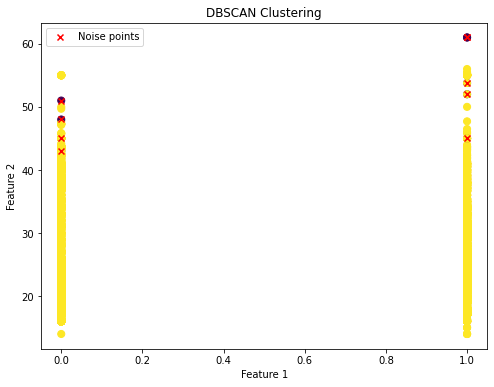

In [10]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your feature matrix
X = df.select_dtypes(include=['number'])  # Select only numerical columns

# Specify DBSCAN parameters
epsilon = 5  # Maximum distance between points to be considered neighbors
min_samples = 5  # Minimum number of points required to form a cluster

# Initialize DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit DBSCAN to the data
dbscan.fit(X)

# Get cluster labels (-1 represents noise/outliers)
cluster_labels = dbscan.labels_
noise_indices = np.where(cluster_labels == -1)[0]
# Plot the clustering results
plt.figure(figsize=(8, 6))

# Plot points colored by cluster label
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis', s=50)

# Highlight noise points
plt.scatter(X.iloc[noise_indices, 0], X.iloc[noise_indices, 1], c='red', marker='x', label='Noise points')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming X is your feature matrix
X = df.select_dtypes(include=['number'])  # Select only numerical columns

# Specify DBSCAN parameters
epsilon = 5  # Maximum distance between points to be considered neighbors
min_samples = 5  # Minimum number of points required to form a cluster

# Initialize DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit DBSCAN to the data
dbscan.fit(X)

# Get cluster labels (-1 represents noise/outliers)
cluster_labels = dbscan.labels_
noise_indices = np.where(cluster_labels == -1)[0]

# Assign cluster labels to the DataFrame
df['cluster_labels'] = cluster_labels

# Plot the clustering results using scatter plot matrix
sns.pairplot(df, diag_kind='kde', hue='cluster_labels', palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your feature matrix
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(X)

# Convert the normalized data back to a DataFrame (if needed)
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Display the normalized DataFrame
df_normalized

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1.0,0.222192,0.475586,0.338497,1.0,1.0,0.500000,0.661099,0.666667,0.0,0.881787,0.0,0.000000,0.488237,0.5,0.75
1,0.0,0.085106,0.209260,0.142792,1.0,1.0,0.500000,0.666667,0.333333,0.0,0.500000,0.0,0.333333,0.500000,1.0,0.00
2,0.0,0.085106,0.497391,0.088577,1.0,1.0,0.440267,0.137228,0.666667,0.0,0.455189,0.0,0.288682,0.836792,1.0,0.75
3,0.0,0.147931,0.496002,0.732007,1.0,1.0,1.000000,0.666667,0.666667,0.0,0.337031,0.0,0.489288,0.390099,0.5,0.75
4,1.0,0.375342,0.883049,0.434708,1.0,1.0,0.839832,0.323824,0.666667,0.0,0.489924,0.0,0.655991,0.465861,0.5,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1.0,0.236959,0.602336,0.596452,1.0,1.0,0.959792,0.666667,0.666667,0.0,0.575905,0.0,0.443506,0.098340,0.5,0.75
20754,1.0,0.085106,0.494613,0.087262,0.0,1.0,1.000000,1.000000,0.333333,0.0,0.000000,0.0,0.666667,0.500000,0.5,0.75
20755,1.0,0.129809,0.703030,0.528177,1.0,1.0,0.703909,0.666667,0.666667,0.0,0.500000,0.0,0.386013,0.599220,1.0,0.75
20756,1.0,0.422403,0.475590,0.353174,1.0,1.0,0.835619,0.323824,0.666667,0.0,0.572419,0.0,0.000000,0.486917,1.0,0.00


In [98]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X is your feature matrix and y is your target variable
# Initialize SelectKBest with the desired scoring function
selector = SelectKBest(score_func=f_classif, k=13)  # Adjust the number of features (k) as needed

# Fit the selector to your data and transform it
X_selected = selector.fit_transform(df_normalized, lable)

# Get the selected features
selected_features = X.columns[selector.get_support()]
selected_features

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'CALC', 'MTRANS'],
      dtype='object')

In [99]:
X_FS = df_normalized[selected_features]
X_FS

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,FAF,CALC,MTRANS
0,1.0,0.222192,0.475586,0.338497,1.0,1.0,0.500000,0.661099,0.666667,0.881787,0.000000,0.5,0.75
1,0.0,0.085106,0.209260,0.142792,1.0,1.0,0.500000,0.666667,0.333333,0.500000,0.333333,1.0,0.00
2,0.0,0.085106,0.497391,0.088577,1.0,1.0,0.440267,0.137228,0.666667,0.455189,0.288682,1.0,0.75
3,0.0,0.147931,0.496002,0.732007,1.0,1.0,1.000000,0.666667,0.666667,0.337031,0.489288,0.5,0.75
4,1.0,0.375342,0.883049,0.434708,1.0,1.0,0.839832,0.323824,0.666667,0.489924,0.655991,0.5,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1.0,0.236959,0.602336,0.596452,1.0,1.0,0.959792,0.666667,0.666667,0.575905,0.443506,0.5,0.75
20754,1.0,0.085106,0.494613,0.087262,0.0,1.0,1.000000,1.000000,0.333333,0.000000,0.666667,0.5,0.75
20755,1.0,0.129809,0.703030,0.528177,1.0,1.0,0.703909,0.666667,0.666667,0.500000,0.386013,1.0,0.75
20756,1.0,0.422403,0.475590,0.353174,1.0,1.0,0.835619,0.323824,0.666667,0.572419,0.000000,1.0,0.00


In [100]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming X is your feature matrix and y is your target variable
# Initialize StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform stratified sampling
for train_index, test_index in stratified_split.split(X_FS, lable):
    X_train, X_test = X_FS.iloc[train_index], X_FS.iloc[test_index]
    y_train, y_test = lable.iloc[train_index], lable.iloc[test_index]

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on your data
rf_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = rf_classifier.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming y_true are the true labels and y_pred are the predicted labels
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[475  29   0   0   0   1   0]
 [ 32 543   3   0   0  29  10]
 [  1   0 519  16   3  11  32]
 [  0   0  22 628   0   0   0]
 [  0   0   1   1 806   1   0]
 [  2  51  10   0   0 355  67]
 [  0  11  40   3   0  57 393]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       505
         1.0       0.86      0.88      0.87       617
         2.0       0.87      0.89      0.88       582
         3.0       0.97      0.97      0.97       650
         4.0       1.00      1.00      1.00       809
         5.0       0.78      0.73      0.76       485
         6.0       0.78      0.78      0.78       504

    accuracy                           0.90      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.90      0.90      0.90      4152

Accuracy: 0.8957129094412332


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', )
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Holy shit!

In [ ]:
#SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='poly', C=1.0, gamma='scale')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Not So good


In [101]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Train the classifier on your data
gb_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = gb_classifier.predict(X_test)

In [102]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[482  22   0   0   0   1   0]
 [ 35 548   1   0   0  23  10]
 [  1   3 523  15   3   6  31]
 [  1   0  19 629   0   0   1]
 [  0   0   2   1 806   0   0]
 [  1  44   9   0   0 370  61]
 [  0   8  38   3   0  43 412]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       505
         1.0       0.88      0.89      0.88       617
         2.0       0.88      0.90      0.89       582
         3.0       0.97      0.97      0.97       650
         4.0       1.00      1.00      1.00       809
         5.0       0.84      0.76      0.80       485
         6.0       0.80      0.82      0.81       504

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152

Accuracy: 0.9079961464354528


In [128]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', )
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [4152, 13840]

<Figure size 576x432 with 0 Axes>

# Slightly better 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
lr_classifier = LogisticRegression()

# Train the classifier on your data
lr_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = lr_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# The Worst

In [116]:
testData = pd.read_csv("test.csv")
testData

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [117]:
for col in testData.select_dtypes(include=['object']).columns: 
    ordinal_encoder = OrdinalEncoder()
    testData[col] = ordinal_encoder.fit_transform(testData[[col]])

In [118]:
testData= testData[X_train.columns]
testData

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,FAF,CALC,MTRANS
0,1.0,26.899886,1.848294,120.644178,1.0,1.0,2.938616,3.000000,2.0,2.825629,0.855400,2.0,3.0
1,0.0,21.000000,1.600000,66.000000,1.0,1.0,2.000000,1.000000,2.0,3.000000,1.000000,2.0,3.0
2,0.0,26.000000,1.643355,111.600553,1.0,1.0,3.000000,3.000000,2.0,2.621877,0.000000,2.0,3.0
3,1.0,20.979254,1.553127,103.669116,1.0,1.0,2.000000,2.977909,2.0,2.786417,0.094851,2.0,3.0
4,0.0,26.000000,1.627396,104.835346,1.0,1.0,3.000000,3.000000,2.0,2.653531,0.000000,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1.0,23.327836,1.721384,78.030383,1.0,0.0,2.813234,3.000000,2.0,1.000000,0.807076,2.0,3.0
13836,0.0,29.000000,1.590000,62.000000,0.0,1.0,3.000000,3.000000,2.0,2.000000,0.000000,2.0,3.0
13837,0.0,22.935612,1.585547,44.376637,0.0,1.0,3.000000,2.273740,1.0,2.000000,1.949840,2.0,3.0
13838,1.0,21.000000,1.620000,53.000000,1.0,1.0,2.000000,3.000000,2.0,2.000000,3.000000,3.0,3.0


In [119]:
y_pred = gb_classifier.predict(testData)

In [120]:
y_pred

array([3., 5., 5., ..., 5., 3., 3.])

In [121]:
id = pd.read_csv("test.csv")
id

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [122]:
id = id["id"]
id


0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64

In [123]:
df_arr = pd.DataFrame(y_pred, columns=['NObeyesdad'])
df_arr

,NObeyesdad
0,3.0
1,5.0
2,5.0
3,3.0
4,5.0
...,...
13835,3.0
13836,5.0
13837,5.0
13838,3.0


In [124]:
# Assuming encoded_labels is your Series with encoded labels
# Define a dictionary mapping encoded labels to original labels
label_mapping = {0: 'Insufficient_Weight'
                 , 1: 'Normal_Weight'
                 , 2: 'Obesity_Type_I' 
                 , 3: 'Obesity_Type_II'
                 , 4: 'Obesity_Type_III'
                 , 5: 'Overweight_Level_I'
                 , 6: 'Overweight_Level_II'}


# Transform encoded labels back to original labels using the mapping
original_labels = df_arr["NObeyesdad"].map(label_mapping)

In [125]:
original_labels

0           Obesity_Type_II
1        Overweight_Level_I
2        Overweight_Level_I
3           Obesity_Type_II
4        Overweight_Level_I
                ...        
13835       Obesity_Type_II
13836    Overweight_Level_I
13837    Overweight_Level_I
13838       Obesity_Type_II
13839       Obesity_Type_II
Name: NObeyesdad, Length: 13840, dtype: object

In [126]:
original_labels = pd.DataFrame(original_labels, columns=['NObeyesdad'])
original_labels


,NObeyesdad
0,Obesity_Type_II
1,Overweight_Level_I
2,Overweight_Level_I
3,Obesity_Type_II
4,Overweight_Level_I
...,...
13835,Obesity_Type_II
13836,Overweight_Level_I
13837,Overweight_Level_I
13838,Obesity_Type_II


In [127]:
submission = pd.concat([id, original_labels], axis=1)
submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Overweight_Level_I
3,20761,Obesity_Type_II
4,20762,Overweight_Level_I
...,...,...
13835,34593,Obesity_Type_II
13836,34594,Overweight_Level_I
13837,34595,Overweight_Level_I
13838,34596,Obesity_Type_II


In [115]:
submission.to_csv('output.csv', index=False)